In [2]:
from defense import *
from utils import *

In [3]:
# with more output than the original RGD code
# for demo only

def remap(img,index):
    n = img.shape[0]
    m = img.shape[1]
    if np.ndim(img)>2:
        outimgnp = np.zeros((n,m,img.shape[2]))
    else:
        outimgnp = np.zeros((n,m))
    for i in range(n):
        for j in range(m):
            outimgnp[j,i]=img[tuple(index[i][j])]
    return outimgnp

def demoGD(img,distort_limit = 0.25):
    num_steps = 10

    xsteps = [1 + random.uniform(-distort_limit, distort_limit) for i in range(num_steps + 1)]
    ysteps = [1 + random.uniform(-distort_limit, distort_limit) for i in range(num_steps + 1)]

    height, width = img.shape[:2]

    x_step = width // num_steps
    y_step = height // num_steps

    gridimg = np.copy(orig)
    xind = np.arange(0,299,40)[1:]
    yind = np.arange(0,299,40)[1:]
    gridimg[xind] = [1.0,0.38,0.0]
    gridimg[xind+1] = [1.0,0.38,0.0]
    gridimg[:,yind] = [1.0,0.38,0.0]
    gridimg[:,yind+1] = [1.0,0.38,0.0]   
    
    xx = np.zeros(width, np.float32)
    prev = 0
    xcur = []
    for idx, x in enumerate(range(0, width, x_step)):
        start = x
        end = x + x_step
        if end > width:
            end = width
            cur = width
        else:
            cur = prev + x_step * xsteps[idx]

        xx[start:end] = np.linspace(prev, cur, end - start)
        prev = cur
        xcur.append(cur)

    
    yy = np.zeros(height, np.float32)
    prev = 0
    ycur = []
    for idx, y in enumerate(range(0, height, y_step)):
        start = y
        end = y + y_step
        if end > height:
            end = height
            cur = height
        else:
            cur = prev + y_step * ysteps[idx]

        yy[start:end] = np.linspace(prev, cur, end - start)
        prev = cur
        ycur.append(cur)
    xx = np.round(xx).astype(int)
    yy = np.round(yy).astype(int)
    xx[xx >= 299] = 298
    yy[yy >= 299] = 298

    map_x, map_y = np.meshgrid(xx, yy)
    
    index=np.dstack((map_y,map_x))
    outgridimg = remap(gridimg,index)
    if np.ndim(img)>2:
        outgridimg = outgridimg.transpose(1,0,2)
    else:
        outgridimg = outgridimg.T
        
    outimg = remap(img,index)
    if np.ndim(img)>2:
        outimg = outimg.transpose(1,0,2)
    else:
        outimg = outimg.T
    return outgridimg,gridimg,outimg

In [4]:
orig = load_image('cat.jpg')

In [5]:
gdedgrid,grid,gdedorig = demoGD(orig)

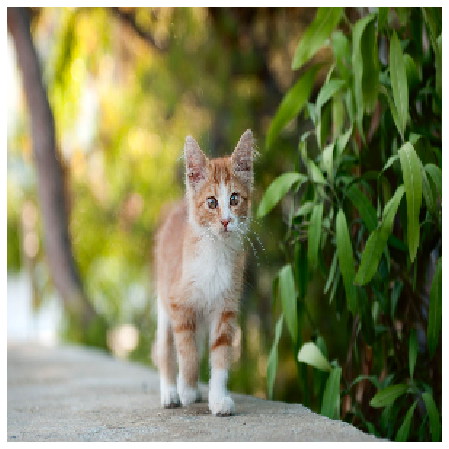

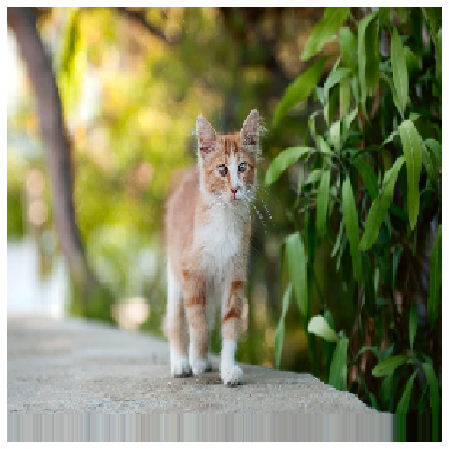

In [6]:
#visionary demo

plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.axis('off')
plt.imshow(orig)
plt.show()
plt.axis('off')
plt.imshow(gdedorig)
plt.show()

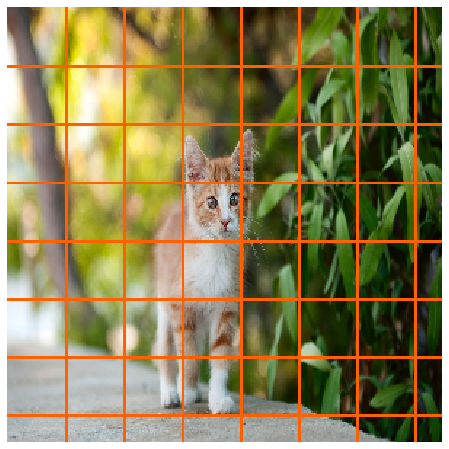

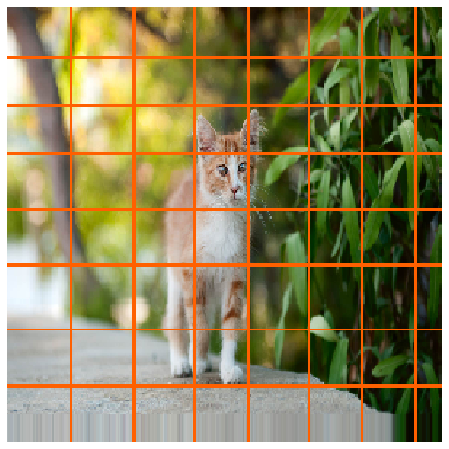

In [7]:
plt.axis('off')
plt.imshow(grid)
plt.show()

plt.axis('off')
plt.imshow(gdedgrid)
plt.show()